In [17]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from pathlib import Path
import os

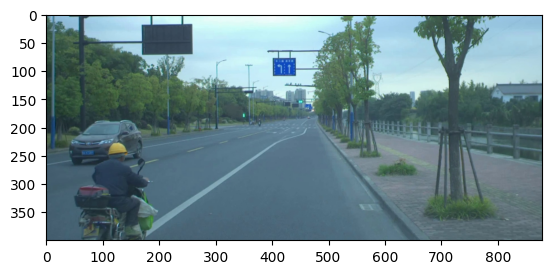

In [18]:
frames = []

for child in Path('../data/stereo_video2/').iterdir():
    if child.is_file():
        frames.append(cv2.cvtColor(cv2.imread('../data/stereo_video2/' + child.name), cv2.COLOR_BGR2RGB))
plt.imshow(frames[0])

Create video from frames.

In [21]:
height, width, layers = frames[0].shape  
  
video = cv2.VideoWriter("stereo_video.mp4", cv2.VideoWriter_fourcc(*'MP4V'), 60, (width, height)) 

for frame in frames: 
    video.write(frame) 
video.release()

print(len(frames))

1073


Get difference in adjacent frames and display the highest difference.

In [22]:
differences = [] * len(frames)
for i in range(0, len(frames)):
    differences[i] = (np.sum(np.abs(frame[i+1] - frame[i])))
    
differences = np.array(differences)
differences

IndexError: index 400 is out of bounds for axis 0 with size 400

Max difference of sum of abs between two consecutive frames 364252
Frame indices :  6  and  7


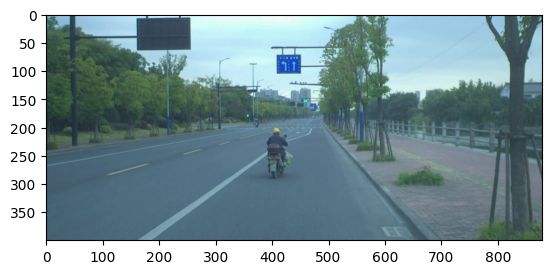

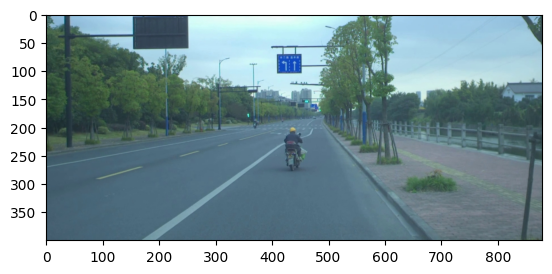

In [ ]:
max_frame_index = differences.argmax(axis=0)
print("Max difference of sum of abs between two consecutive frames", differences[max_frame_index])
print('Frame indices : ', max_frame_index, ' and ', max_frame_index+1)
plt.imshow(frames[max_frame_index])
plt.show()
plt.imshow(frames[max_frame_index+1])